# Problem 3: Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us generate and plot a dataset based on  

$$
y(x) = e^{3x}\dfrac{\sin(3\pi^2(x-0.5))}{3\pi^2(x-0.5)}
$$

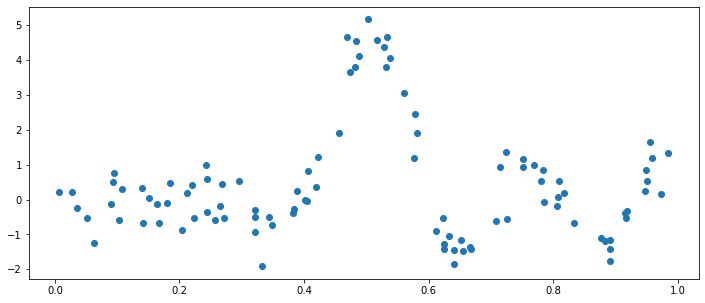

In [2]:
m = 100
x = np.random.rand(m)

num = np.sin(3*np.pi**2*(x-0.5)) # numerator
den = 3*np.pi**2*(x-0.5) # denominator
y = np.exp(3*x)*num/den + 0.5*np.random.randn(m) # function

plt.figure(figsize=(12,5))
plt.plot(x,y,'o')

## Part 1

Fit a polynomial to the datapoints (do not regularize your polynomial model).
Explain how you selected the degree of the fitted polynomial.

In [3]:
x_train, y_train = x[0:75], y[0:75] #first 3/4
x_test, y_test = x[75:m], y[75:m] #last 1/4

In [4]:
m_train = len(x_train) # size of the training set
m_test = len(x_test) # size of the test set
m_plot = 100 # 
x_plot = np.linspace(-1,1,m_plot) 

Text(0, 0.5, 'mean squared error')

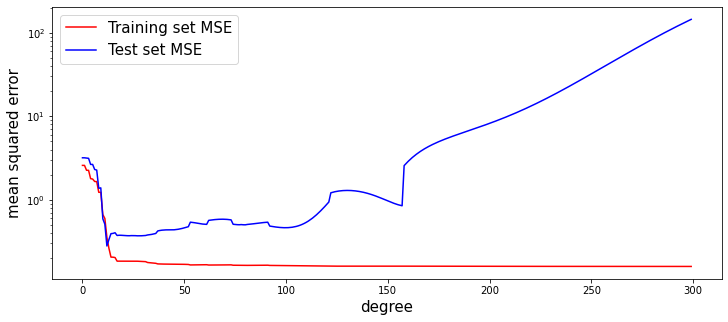

In [5]:
max_degree = 300
# initialize MSE vectors
MSE_test = np.zeros(max_degree)
MSE_train = np.zeros(max_degree)
# loop over degrees
for degree in range(max_degree): # degree = 0, 1, 2, ..., max_degree
    'build feature matrices'
    X_train = np.ones((m_train,degree+1))
    X_test = np.ones((m_test,degree+1))
    for i in range(degree):
        X_train[:,i+1] = x_train**(i+1)
        X_test[:,i+1] = x_test**(i+1)
        
    'best linear model'
    #theta = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))
    theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]
    
    'Mean squared errors'
    MSE_train[degree]=np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
    MSE_test[degree]=np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)

# plot results
plt.figure(figsize=(12,5))
plt.semilogy(range(max_degree),MSE_train,'r-',label='Training set MSE') #semilogarithmic plot
plt.semilogy(range(max_degree),MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.xlabel('degree', fontsize=15)
plt.ylabel('mean squared error', fontsize=15)

I'll use degree = 15

Training Set Mean Squared Error: 0.20569588996245528
Test Set Mean Squared Error: 0.39626896602563333


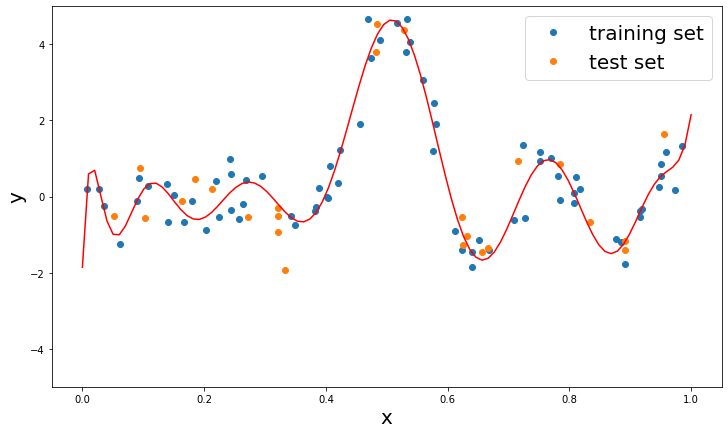

In [7]:
# plot the degree-15 polynomial fitting
degree =  15 

m_plot = 100 # 
x_plot = np.linspace(0,1,m_plot) 

'build feature matrices'
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_train[:,i+1] = x_train**(i+1)
    X_test[:,i+1] = x_test**(i+1)
    X_plot[:,i+1] = x_plot**(i+1)
    
'best linear model'
theta = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))
theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim([-5,5])

'plot linear model'       
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

## Part 2

Fit a degree-100 polynomial to the datapoints. But this time add a regularization term. Explain how you selected the regularization constant.

Text(0.5, 0, 'regularization constant')

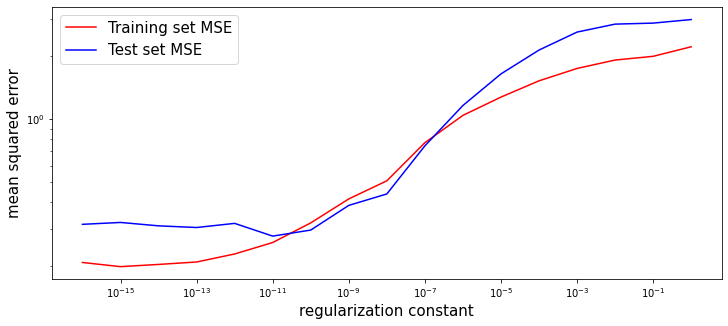

In [11]:
# you code here
degree = 100
C_list = 10.0**(np.arange(-16,1)) # regularization constants

'initialize MSE vectors'
MSE_test = np.zeros(len(C_list))
MSE_train = np.zeros(len(C_list))
for j in range(len(C_list)):
    C = C_list[j]
    'build feature matrices'
    X_train = np.ones((m_train,degree+1))
    X_test = np.ones((m_test,degree+1))
    for i in range(degree):
        X_train[:,i+1] = x_train**(i+1)
        X_test[:,i+1] = x_test**(i+1)
        
    'best linear model'
    theta = np.linalg.solve(X_train.T.dot(X_train)+C*np.identity(degree+1), X_train.T.dot(y_train))
    
    'Mean squared errors'
    MSE_train[j]=np.sum((y_train-X_train.dot(theta))**2)/len(x_train)
    MSE_test[j]=np.sum((y_test-X_test.dot(theta))**2)/len(x_test)

'plot results'
plt.figure(figsize=(12,5))
plt.loglog(C_list,MSE_train,'r-',label='Training set MSE') 
plt.loglog(C_list,MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.ylabel('mean squared error', fontsize=15)
plt.xlabel('regularization constant', fontsize=15)

I'll use C = 10**-11

Training Set Mean Squared Error: 0.2578702027939247
Test Set Mean Squared Error: 0.2766907285692114


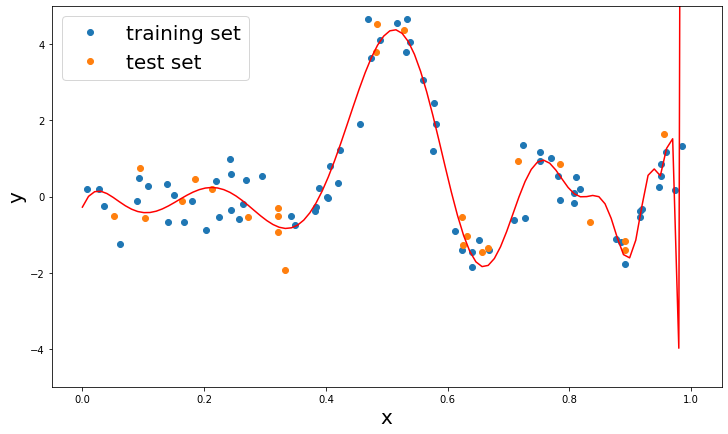

In [15]:
degree = 100 #
C = 1e-11 # regularization constant

'build feature matrices'
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_train[:,i+1] = x_train**(i+1)
    X_test[:,i+1] = x_test**(i+1)
    X_plot[:,i+1] = x_plot**(i+1)
    
'best linear model'
theta = np.linalg.solve(X_train.T.dot(X_train)+C*np.identity(degree+1), X_train.T.dot(y_train))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim([-5,5])

'plot linear model'       
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))